In [1]:
import experiment as exp
import experiment_statvec as expsv
from qiskit import Aer

import numpy as np
import matplotlib.pyplot as plt
import plot_utils

In [29]:
from qiskit_aer import QasmSimulator
from qiskit.providers.models.backendconfiguration import QasmBackendConfiguration
# configuration = QasmBackendConfiguration("qasm_simulator", )
# qs = QasmSimulator(configuration)
# print(qs.available_devices())


('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer')

In [33]:
method = ('COBYLA', {'rhobeg': 1.2,
                     'maxiter': 1000,
                     'disp': False,
                     'catol': 0.0002})

density = 0.4

backend_creator = lambda: Aer.get_backend('qasm_simulator', device = 'GPU')


In [3]:
exp_dim = 9

In [4]:
experiment = exp.Experiment(p = 1, 
                            dim=exp_dim,
                            method=method,
                            create_backend=backend_creator)

model = experiment.generate_model(dens=density)

In [31]:
def get_computable_function(model, dim):
    def func(shots, p):
        experiment = exp.Experiment(p = p, 
                            dim=dim,
                            method=method,
                            create_backend=backend_creator,
                            shots=shots)
        # print(f"solving experiment with {experiment.p} - p, {experiment.shots} - shots")
        brute_results = experiment.brute_force(model)
        minval = min(brute_results.values())
        res = [k for k, v in brute_results.items() if v == minval]
        acc = 0
        acc2 = 0
        for i in range(10):
            solution = experiment.solve(model)
            theta = solution.x
            counts, (item, _) = experiment.retrieve_state_distribution(model, theta)
            acc += sum([counts.get(r, 0) for r in res]) / sum(counts.values())
            acc2 += solution.nfev
        return acc / 10,  acc2 / 10 * p * shots, acc2 / 10
    return func

# func = get_computable_function(model)

def compute(func, shots_start, shots_stop, shots_steps, depth_total):
    shots = np.logspace(shots_start, shots_stop, shots_steps)
    depth = range(1, depth_total)

    shots, depth = np.meshgrid(shots, depth)

    F = np.array([
        [func(*arg) for arg in zip(s, p)]
         for s, p in zip(shots, depth)
    ])
    return shots, depth, F


In [35]:
# model = experiment.generate_model(dens=density)
func = get_computable_function(model, exp_dim)
s, p, f = compute(func, 1, 4, 9, 6)
fig, axs = plt.subplots(3, 1)

prob = list(map(lambda x: list(map(lambda y: y[0], x)), f))
c = axs[0].pcolormesh(s, p, prob, cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')
axs[0].set_xscale('log')
shape = [len(prob), len(prob[0])]
for i in range(shape[0]):
    for j in range(shape[1]):
        axs[0].text(s[0, j], p[i, 0], f"{prob[i][j]:2.2}", ha="center", va="center", color="b", fontsize=15)

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')
axs[1].set_xscale('log')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
axs[2].set_xscale('log')
fig.set_size_inches(11, 20, forward=True)
plt.show()

KeyboardInterrupt: 

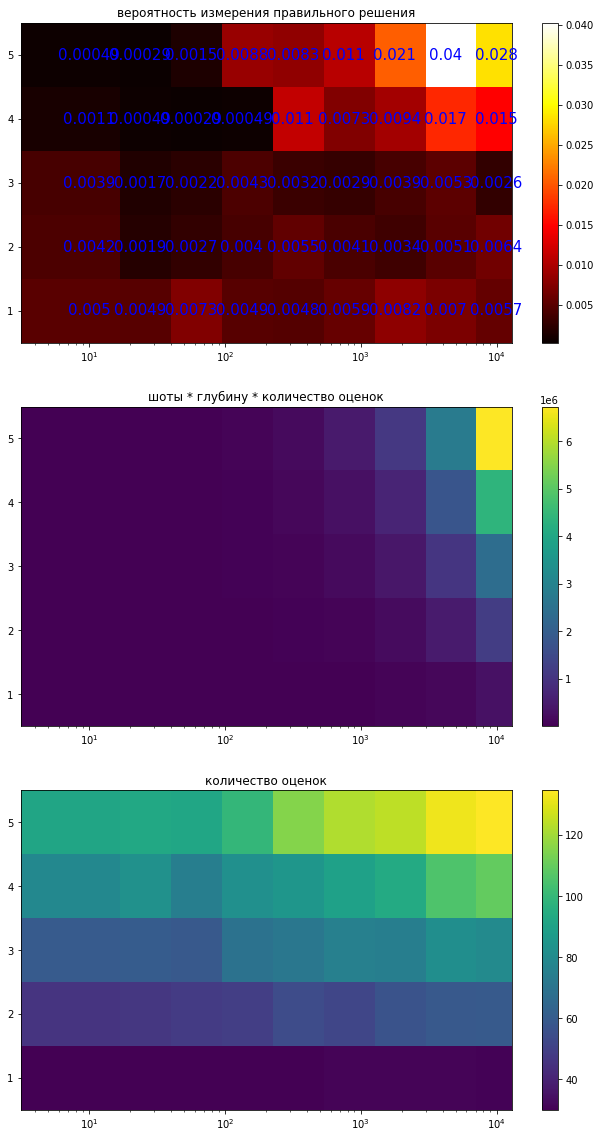

In [6]:
experiment2 = exp.Experiment(p = 1, 
                            dim=13,
                            method=method,
                            create_backend=backend_creator)
model2 = experiment2.generate_model(dens=density)
func = get_computable_function(model2, 13)
s, p, f = compute(func, 1, 4, 9, 6)
fig, axs = plt.subplots(3, 1)

prob = list(map(lambda x: list(map(lambda y: y[0], x)), f))
c = axs[0].pcolormesh(s, p, prob, cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')
axs[0].set_xscale('log')
shape = [len(prob), len(prob[0])]
for i in range(shape[0]):
    for j in range(shape[1]):
        axs[0].text(s[0, j], p[i, 0], f"{prob[i][j]:2.2}", ha="center", va="center", color="b", fontsize=15)

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')
axs[1].set_xscale('log')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
axs[2].set_xscale('log')
fig.set_size_inches(11, 20, forward=True)
plt.show()

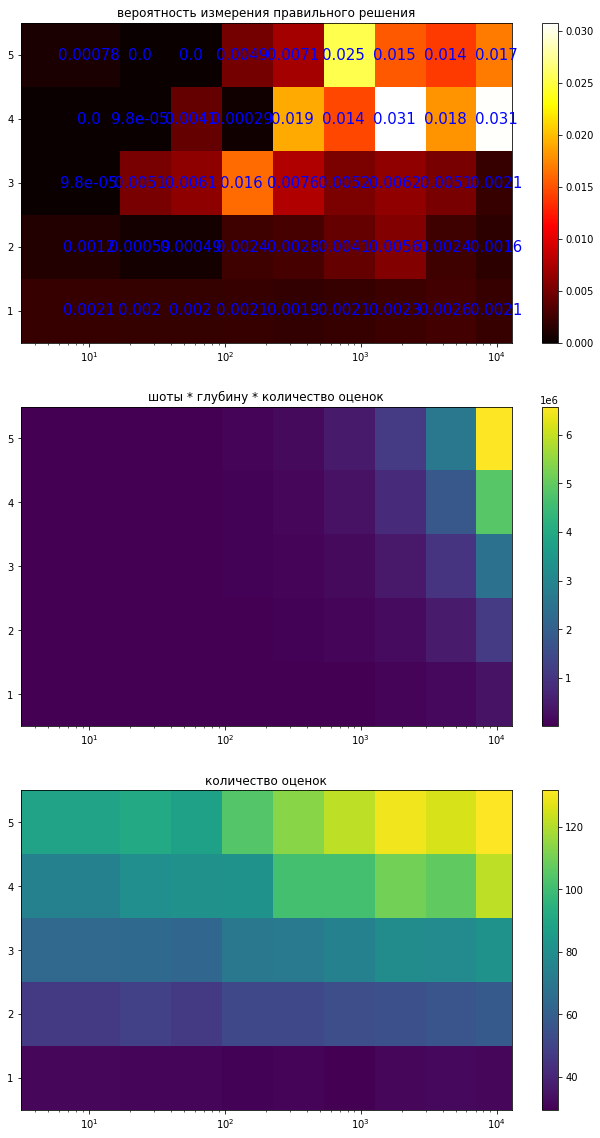

In [8]:
experiment2 = exp.Experiment(p = 1, 
                            dim=20,
                            method=method,
                            create_backend=backend_creator)
model2 = experiment2.generate_model(dens=density)
func = get_computable_function(model2, 20)
s, p, f = compute(func, 1, 4, 9, 6)
fig, axs = plt.subplots(3, 1)

prob = list(map(lambda x: list(map(lambda y: y[0], x)), f))
c = axs[0].pcolormesh(s, p, prob, cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')
axs[0].set_xscale('log')
shape = [len(prob), len(prob[0])]
for i in range(shape[0]):
    for j in range(shape[1]):
        axs[0].text(s[0, j], p[i, 0], f"{prob[i][j]}", ha="center", va="center", color="b", fontsize=15)

c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[1])
axs[1].set_title('шоты * глубину * количество оценок')
axs[1].set_xscale('log')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
axs[2].set_xscale('log')
fig.set_size_inches(11, 20, forward=True)
plt.show()

Придумать, как расследовать из-за чего рандом в вероятности измерения правильного решения - из-за шотов или из-за классической оптимизации --> Это не слишком правильное решение, но добавить статвектор как бесконечное количество шотов

float64
5 9


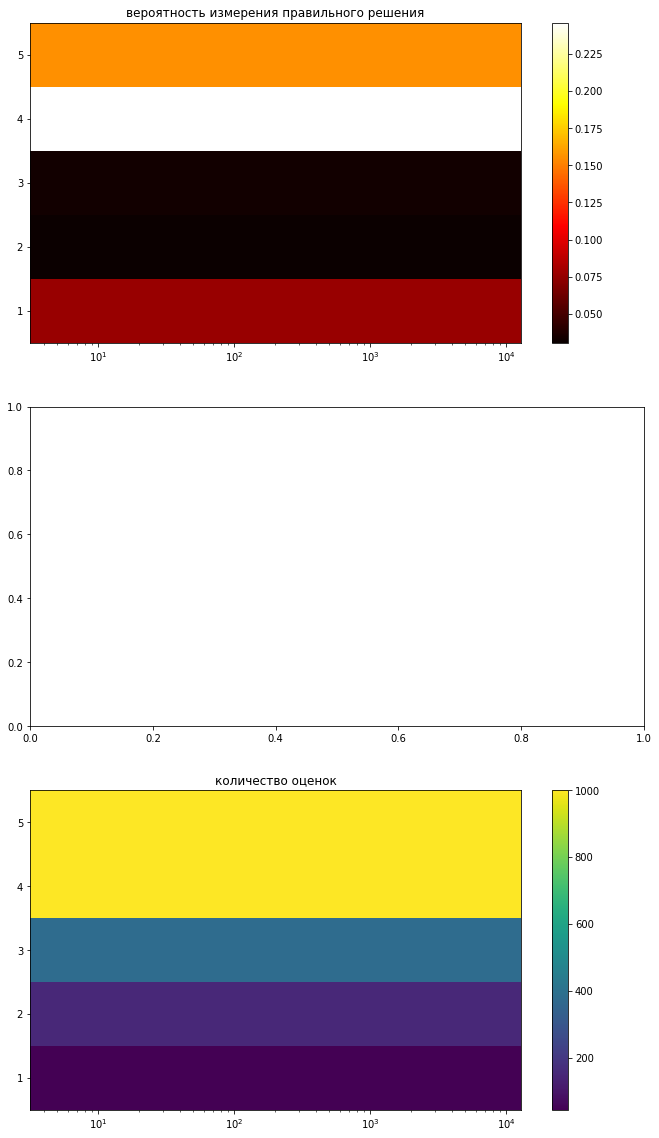

In [30]:
def get_computable_function_sv(model):
    def func(p):
        experiment = expsv.ExperimentStatvec(p = p, 
                            dim=exp_dim,
                            method=method)
        brute_results = experiment.brute_force(model)
        minval = min(brute_results.values())
        res = [k for k, v in brute_results.items() if v == minval]

        solution = experiment.solve(model)
        theta = solution.x
        probs, (item, _) = experiment.retrieve_state_distribution(model, theta)
        acc = sum([probs.get(r, 0) for r in res]) / sum(probs.values())
        return acc,  solution.nfev * p, solution.nfev
    return func

def compute_sv(func, depth_total):
    shots = np.logspace(0, 0, 1)
    depth = range(1, depth_total)

    shots, depth = np.meshgrid(shots, depth)

    F = np.array([
        [func(*arg) for arg in zip(s, p)]
         for s, p in zip(shots, depth)
    ])
    return shots, depth, F

func = get_computable_function_sv(model)

s_sv, p_sv, f_sv = compute_sv(func, 1, 4, 9, 6)

fff = [[fff[0] for fff in ff] for ff in f_sv]
c = axs[0].pcolormesh(s_sv, p, fff, cmap='hot')
fig.colorbar(c, ax=axs[0])
axs[0].set_title('вероятность измерения правильного решения')
axs[0].set_xscale('log')
print(len(fff), len(fff[0]))
# for i in range(len(fff)):
#     for j in range(len(fff[0])):
#         axs[0].text(i, j, fff[i][j], ha="center", va="center", color="b")

# c = axs[1].pcolormesh(s, p, [[fff[1] for fff in ff] for ff in f])
# fig.colorbar(c, ax=axs[1])
# axs[1].set_title('шоты * глубину * количество оценок')
# axs[1].set_xscale('log')

c = axs[2].pcolormesh(s, p, [[fff[2] for fff in ff] for ff in f])
fig.colorbar(c, ax=axs[2])
axs[2].set_title('количество оценок')
axs[2].set_xscale('log')

fig.set_size_inches(11, 20, forward=True)
plt.show()